In [1]:
from read_json import *
from spectrum_integrate import *
from plots import *
from source_filter import *
from variability_estimator import *

In [2]:
import glob
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.table import Table

In [3]:
## import

path_4lac_dr3_catalog = '../4LAC_catalog_generator_v3/resulting_catalogs/agn_pop_4lac_dr3.ecsv'
table_agn_pop_4lac_dr3 = Table.read(path_4lac_dr3_catalog, format='ascii.ecsv')
df_agn_pop_4lac_dr3 = table_agn_pop_4lac_dr3.to_pandas()

df_agn_pop_4lac_dr3.head()

,Source_Name,RAJ2000,DEJ2000,Redshift,SpectrumType,Pivot_Energy,PL_Flux_Density,PL_Index,LP_Flux_Density,LP_Index,LP_beta,CLASS,SED_class,Variability_Index,Frac_Variability,Unc_Frac_Variability,Flux1000,Unc_Flux1000
0,J0001.2+4741,0.3126,47.685902,-inf,PowerLaw,2420.575195,2.156031e-14,2.271696,2.196550e-14,2.254081,0.012156,bcu,ISP,25.313953,0.675882,0.312850,1.259796e-10,2.877197e-11
1,J0001.2-0747,0.3151,-7.797100,-inf,PowerLaw,1721.603882,2.656894e-13,2.116692,2.842831e-13,2.078927,0.051182,bll,LSP,46.780693,0.406565,0.111870,7.471219e-10,5.041939e-11
2,J0001.4-0010,0.3717,-0.169900,0.461516,PowerLaw,4307.082520,6.067356e-15,1.939160,6.488817e-15,1.661223,0.132438,bll,LSP,9.272764,0.000000,10.000000,1.082246e-10,2.914440e-11
3,J0001.5+2113,0.3815,21.218300,1.106000,LogParabola,329.773743,4.683598e-11,2.654060,5.371562e-11,2.514159,0.159319,fsrq,ISP,1910.935791,0.996138,0.213478,1.347354e-09,6.172809e-11
4,J0001.6-4156,0.4165,-41.942501,-inf,PowerLaw,4047.030029,1.881541e-14,1.775175,2.131597e-14,1.693865,0.072754,bcu,HSP,26.393343,0.490977,0.175782,2.821817e-10,3.090882e-11


In [4]:
## saving our changes in a separate dataframe

df_4lac_luana_dr3 = df_agn_pop_4lac_dr3.copy()

In [5]:
df_4lac_luana_dr3 = df_4lac_luana_dr3.drop(df_4lac_luana_dr3.columns[5:11], axis=1)
df_4lac_luana_dr3 = df_4lac_luana_dr3.drop(columns=['RAJ2000', 'DEJ2000', 'Redshift', 'Flux1000', 'Unc_Flux1000'])

In [6]:
## adding spectrum flux calculations

spectrum_flux_values = []
spectrum_flux_Flux1000comparison = []

for index, row in df_4lac_luana_dr3.iterrows():
    source_name = row['Source_Name']
    
    ## integrate from 1-100 GeV
    spectrum_flux_test, diff_flux_test, spec_type_test = integrate_spectrum_flux(source_name, df_agn_pop_4lac_dr3, 1, 100)
    spectrum_flux_Flux1000comparison.append(spectrum_flux_test)
    
    ## integrate from 0.1-100 GeV
    spectrum_flux, diff_flux, spec_type = integrate_spectrum_flux(source_name, df_agn_pop_4lac_dr3, 0.1, 100)
    spectrum_flux_values.append(spectrum_flux)

df_4lac_luana_dr3['Spectrum_Flux_Estimated'] = spectrum_flux_values

/Users/luanareis/Documents/GitHub/CTA_AGN_Pop_Variability/4LAC_variability_analysis/spectrum_integrate.py:71: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  flux_from_spectrum = integrate.quad(lambda x: K * ((x/E_0)**(- alpha - beta * np.log(x/E_0))),


In [7]:
## getting a list of the downloaded sources

folder_path = '../4LAC_lightcurve_downloader_v3/resulting_catalogs/input_lightcurve_downloads_v3/fixed_indexed_lightcurves/3days_ts1_fixedindex_lightcurves'

## glob to get all .json files in the folder
json_files = glob.glob(os.path.join(folder_path, '*.json'))
json_file_names = [os.path.basename(file)[5:17] for file in json_files]

len(json_file_names)

1429

In [8]:
## creating a df for the downloaded sources

df_filtered_4lac_luana_dr3 = df_4lac_luana_dr3[df_4lac_luana_dr3['Source_Name'].isin(json_file_names)].copy()
df_filtered_4lac_luana_dr3.reset_index(drop=True, inplace=True)

print(len(df_filtered_4lac_luana_dr3))

1429


In [9]:
json_source_names = df_filtered_4lac_luana_dr3['Source_Name'].tolist()

len(json_source_names)

1429

The two sources that you have (among 384) and I don't:

J0726.4-4727 - 0.636 +- 0.1189/ 0.552 +- 0.1186

J0010.6+2043

In [10]:
# filter_quality_condition = (
#             srcdf['fit_convergence'].loc[idx] > 0 or
#             srcdf['flux_error'].loc[idx] < 1e-12 or  # arbitrary value representing 0 (false if np.nan)
#             (np.isnan(srcdf['flux'].loc[idx]) and np.isnan(srcdf['flux_upper_limits'].loc[idx])) or
#             (np.isnan(srcdf['flux'].loc[idx]) and srcdf['flux_upper_limits'].loc[idx]<0)  or
#             (srcdf['flux_error'].loc[idx] > 1e-12 and exposure < 1e7)
#         )

In [11]:
## one source

# source_data = Read_json_file('4FGL+J1104.4+3812.json', '3-days', 'fixed')
# source_data = Read_json_file('4FGL+J1040.5+0617.json', '3-days', 'fixed')
source_data = Read_json_file('4FGL+J0726.4-4727.json', 'monthly', 'fixed')

source_df = source_data.dataframe
source_dict = source_data.dictionary

In [12]:
filtered_df, n_unconstrained = filter_outliers(source_df)

In [13]:
n_unconstrained

78

In [14]:
print('number unconstrained:', n_unconstrained)
print('number ULs:', len(filtered_df['flux_upper_limits'].dropna()))
print('number flux values:', len(filtered_df['flux'].dropna()))

print('\n n_unconstrained + flux:', n_unconstrained + len(filtered_df['flux'].dropna()))

print('\n sum:', n_unconstrained + len(filtered_df['flux_upper_limits'].dropna()) + len(filtered_df['flux'].dropna()))
print('\n total bins:', len(source_df))

number unconstrained: 78
number ULs: 35
number flux values: 110

 n_unconstrained + flux: 188

 sum: 223

 total bins: 188


In [15]:
## UL check

bright_ratio = n_unconstrained / len(filtered_df['flux'].dropna())
    

print('bright_ratio: ', bright_ratio)
    

bright_ratio:  0.7090909090909091


In [16]:
inputed_df = input_upperL(filtered_df, 'average')

In [17]:
plots = Plots('J0726.4-4727', df_agn_pop_4lac_dr3, source_dict, source_df)

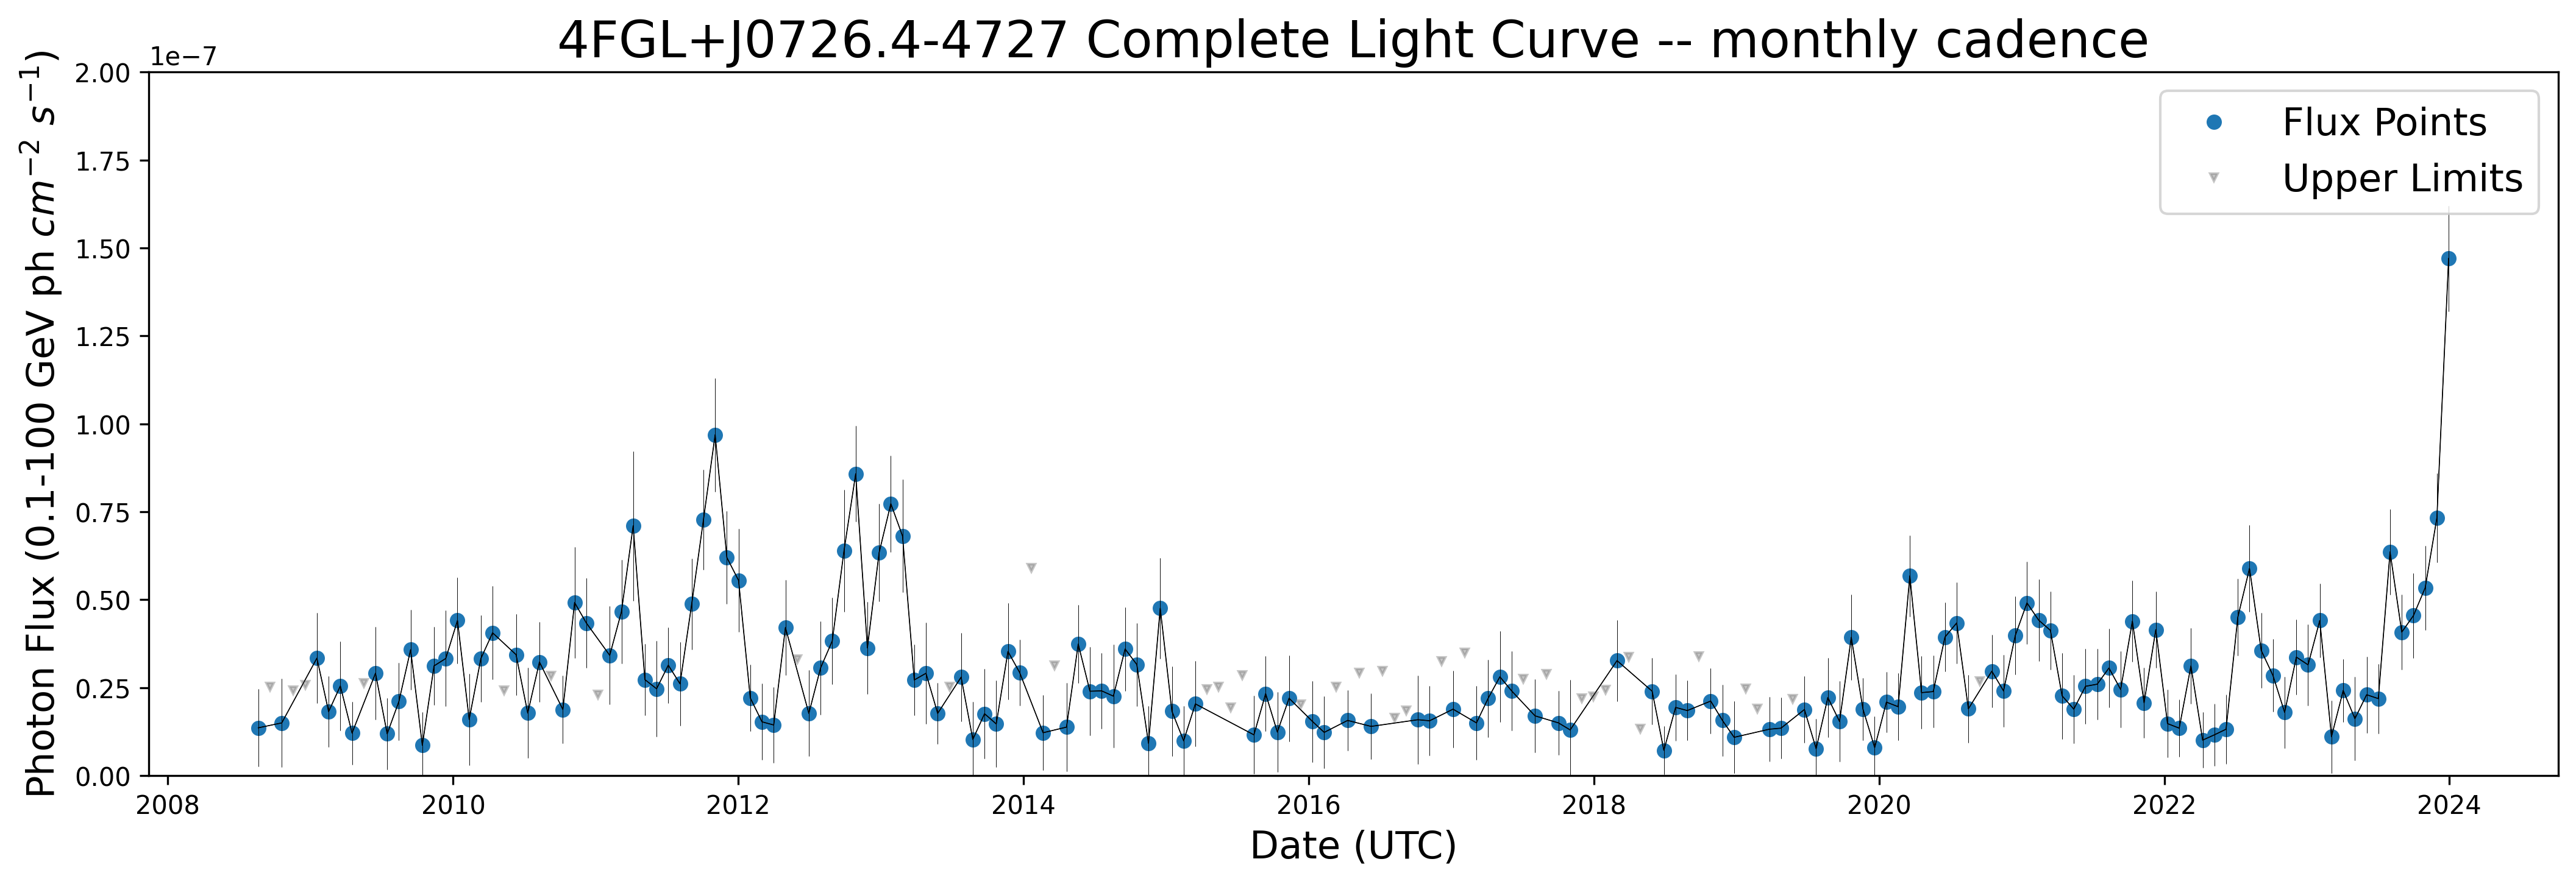

In [26]:
plots.lightcurve_complete(binning="monthly", ylim=2e-7)

In [23]:

# # Generate the filtered light curve
# plots.lightcurve_filtered(binning="monthly", ylim=5)

# # Generate the spectrum plot
# plots.spectrum(power=12, x_dlim=0.1, x_ulim=100, y_dlim=1e-13, y_ulim=1e-9)

# # Generate the normalized excess variance comparison (if implemented)
# # plots.norm_excess_var_3days_monthly()  # Placeholder as no implementation is provided

# # Generate the exposure plot
# plots.exposure()


In [18]:
source_df[:1202]

,fit_convergence,time_ts,values_ts,dlogl,time_flux,flux,time_flux_upper_limits,flux_upper_limits,flux_error
time_fit_convergence,,,,,,,,,
240883201,0,240883201.0,2.18,0.0557,240883201.0,1.360000e-08,NaN,NaN,1.100000e-08
243475201,0,243475201.0,0.17,0.2950,NaN,NaN,243475201.0,2.530000e-08,NaN
246067201,0,246067201.0,2.13,0.9410,246067201.0,1.500000e-08,NaN,NaN,1.260000e-08
248659201,0,248659201.0,0.10,1.6200,NaN,NaN,248659201.0,2.420000e-08,NaN
251251201,0,251251201.0,0.40,0.1650,NaN,NaN,251251201.0,2.590000e-08,NaN
...,...,...,...,...,...,...,...,...,...
715219201,0,715219201.0,30.34,1.7300,715219201.0,4.080000e-08,NaN,NaN,1.070000e-08
717811201,0,717811201.0,27.70,0.3550,717811201.0,4.550000e-08,NaN,NaN,1.200000e-08
720403201,0,720403201.0,35.90,0.2610,720403201.0,5.340000e-08,NaN,NaN,1.190000e-08


In [19]:
filtered_df[:1202]

,fit_convergence,time_ts,values_ts,dlogl,time_flux,flux,time_flux_upper_limits,flux_upper_limits,flux_error
time_fit_convergence,,,,,,,,,
240883201,0,240883201.0,2.18,0.0557,240883201.0,NaN,NaN,NaN,NaN
243475201,0,243475201.0,0.17,0.2950,NaN,NaN,243475201.0,2.530000e-08,NaN
246067201,0,246067201.0,2.13,0.9410,246067201.0,NaN,NaN,NaN,NaN
248659201,0,248659201.0,0.10,1.6200,NaN,NaN,248659201.0,2.420000e-08,NaN
251251201,0,251251201.0,0.40,0.1650,NaN,NaN,251251201.0,2.590000e-08,NaN
...,...,...,...,...,...,...,...,...,...
715219201,0,715219201.0,30.34,1.7300,715219201.0,4.080000e-08,NaN,NaN,1.070000e-08
717811201,0,717811201.0,27.70,0.3550,717811201.0,4.550000e-08,NaN,NaN,1.200000e-08
720403201,0,720403201.0,35.90,0.2610,720403201.0,5.340000e-08,NaN,NaN,1.190000e-08


In [20]:
inputed_df[:1202]

,fit_convergence,time_ts,values_ts,dlogl,time_flux,flux,time_flux_upper_limits,flux_upper_limits,flux_error
time_fit_convergence,,,,,,,,,
240883201,0,240883201.0,2.18,0.0557,240883201.0,3.621273e-08,NaN,NaN,NaN
243475201,0,243475201.0,0.17,0.2950,NaN,3.621273e-08,243475201.0,2.530000e-08,NaN
246067201,0,246067201.0,2.13,0.9410,246067201.0,3.621273e-08,NaN,NaN,NaN
248659201,0,248659201.0,0.10,1.6200,NaN,3.621273e-08,248659201.0,2.420000e-08,NaN
251251201,0,251251201.0,0.40,0.1650,NaN,3.621273e-08,251251201.0,2.590000e-08,NaN
...,...,...,...,...,...,...,...,...,...
715219201,0,715219201.0,30.34,1.7300,715219201.0,4.080000e-08,NaN,NaN,1.070000e-08
717811201,0,717811201.0,27.70,0.3550,717811201.0,4.550000e-08,NaN,NaN,1.200000e-08
720403201,0,720403201.0,35.90,0.2610,720403201.0,5.340000e-08,NaN,NaN,1.190000e-08
